## Consumir dados API- Company Overview - www.alphavantage.co

### Capturar dados Básicos

In [167]:
!pip install python-dotenv
!pip install requests

In [168]:
from dotenv import load_dotenv
import os

load_dotenv()

# Acessando as variáveis:
api_key = os.getenv('API_KEY')
base_url = os.getenv('BASE_URL_OVERVIEW')

In [169]:
import requests
import json

# Função para obter o resumo de uma empresa
def get_company_overview(symbol):
    url = f'{base_url}&symbol={symbol}&apikey={api_key}'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        if symbol in data['Symbol']:
            # Extract specific data points of interest
            company_name = data['Name']
            description = data['Description']
            sector = data['Sector']
            industry = data['Industry']
            market_cap = float(data['MarketCapitalization'])  # Assuming value is a string, convert to float if necessary
            # ... (extract other desired data points)

            # Print or return the extracted information
            print(f"Company Name: {company_name}")
            print(f"Description: {description}")
            print(f"Sector: {sector}")
            print(f"Industry: {industry}")
            print(f"Market Capitalization: {market_cap:,.2f}")  # Format market cap with commas and 2 decimal places
            # ... (print other extracted data points)

            return data  # Alternatively, return the entire overview dictionary
        else:
            print(f"Erro: 'Overview' não encontrado para {symbol}")
    else:
        print(f"Erro na requisição: {response.status_code}")
        return None
    
# Lista de símbolos das empresas
symbols = ['GOOGL', 'AAPL', 'NVDA']

# Loop para obter o resumo de cada empresa
for symbol in symbols:
    overview = get_company_overview(symbol)
    print(f"Resumo da {symbol}:")
    print(json.dumps(overview, indent=4))

Company Name: Alphabet Inc Class A
Description: Alphabet Inc. is an American multinational conglomerate headquartered in Mountain View, California. It was created through a restructuring of Google on October 2, 2015, and became the parent company of Google and several former Google subsidiaries. The two co-founders of Google remained as controlling shareholders, board members, and employees at Alphabet. Alphabet is the world's fourth-largest technology company by revenue and one of the world's most valuable companies.
Sector: TECHNOLOGY
Industry: SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING, ETC.
Market Capitalization: 2,067,932,905,000.00
Resumo da GOOGL:
{
    "Symbol": "GOOGL",
    "AssetType": "Common Stock",
    "Name": "Alphabet Inc Class A",
    "Description": "Alphabet Inc. is an American multinational conglomerate headquartered in Mountain View, California. It was created through a restructuring of Google on October 2, 2015, and became the parent company of Google and severa

## Analise Técnica

### Preparar dados histórico dos preços das ações

In [170]:
!pip install yfinance

In [171]:
import yfinance as yf
import pandas as pd

In [172]:
# Obtendo dados históricos da Apple
#for symbol in symbols:
def obter_preco_acoes(symbol, start, end):
    return yf.download(symbol, start, end) 


In [173]:
start = input('Data inicio:')
end = input('Data fin: ')

# Criar um DataFrame para armazenar os dados
data = pd.DataFrame()

In [174]:
for symbol in symbols:
    df = obter_preco_acoes(symbol, start, end)
    df['symbol'] = symbol
    data = pd.concat([data, df])


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### Informações Básicas

In [175]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,symbol
Date,,,,,,,
2024-06-03,172.539993,174.529999,171.160004,173.169998,172.971481,27459100,GOOGL
2024-06-04,173.279999,173.850006,171.889999,173.789993,173.590759,26879600,GOOGL
2024-06-05,175.199997,176.649994,173.929993,175.410004,175.208923,22068500,GOOGL
2024-06-06,175.899994,177.149994,175.750000,176.729996,176.527390,23251000,GOOGL
2024-06-07,177.050003,177.869995,174.300003,174.460007,174.260010,19661400,GOOGL


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162 entries, 2024-06-03 to 2024-08-19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       162 non-null    float64
 1   High       162 non-null    float64
 2   Low        162 non-null    float64
 3   Close      162 non-null    float64
 4   Adj Close  162 non-null    float64
 5   Volume     162 non-null    int64  
 6   symbol     162 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 10.1+ KB


In [177]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,162.000000,162.000000,162.000000,162.000000,162.000000,1.620000e+02
mean,170.571827,173.032889,168.239124,170.737426,170.656985,1.471903e+08
std,40.509414,40.448096,40.869132,40.637963,40.554618,1.599291e+08
min,92.059998,103.410004,90.690002,98.910004,98.910004,1.024210e+07
25%,127.185001,129.229996,124.370003,126.777500,126.777500,2.756050e+07
50%,176.004997,177.219994,174.555000,176.459999,176.413696,5.769605e+07
75%,210.079998,214.059998,208.235001,209.785004,209.542461,2.567218e+08
max,236.479996,237.229996,233.089996,234.820007,234.548523,6.646960e+08


### Candlestick

In [178]:
!pip install mplfinance
!pip install seaborn

In [179]:
import mplfinance as mpf
import matplotlib.pyplot as plt
import seaborn as sns

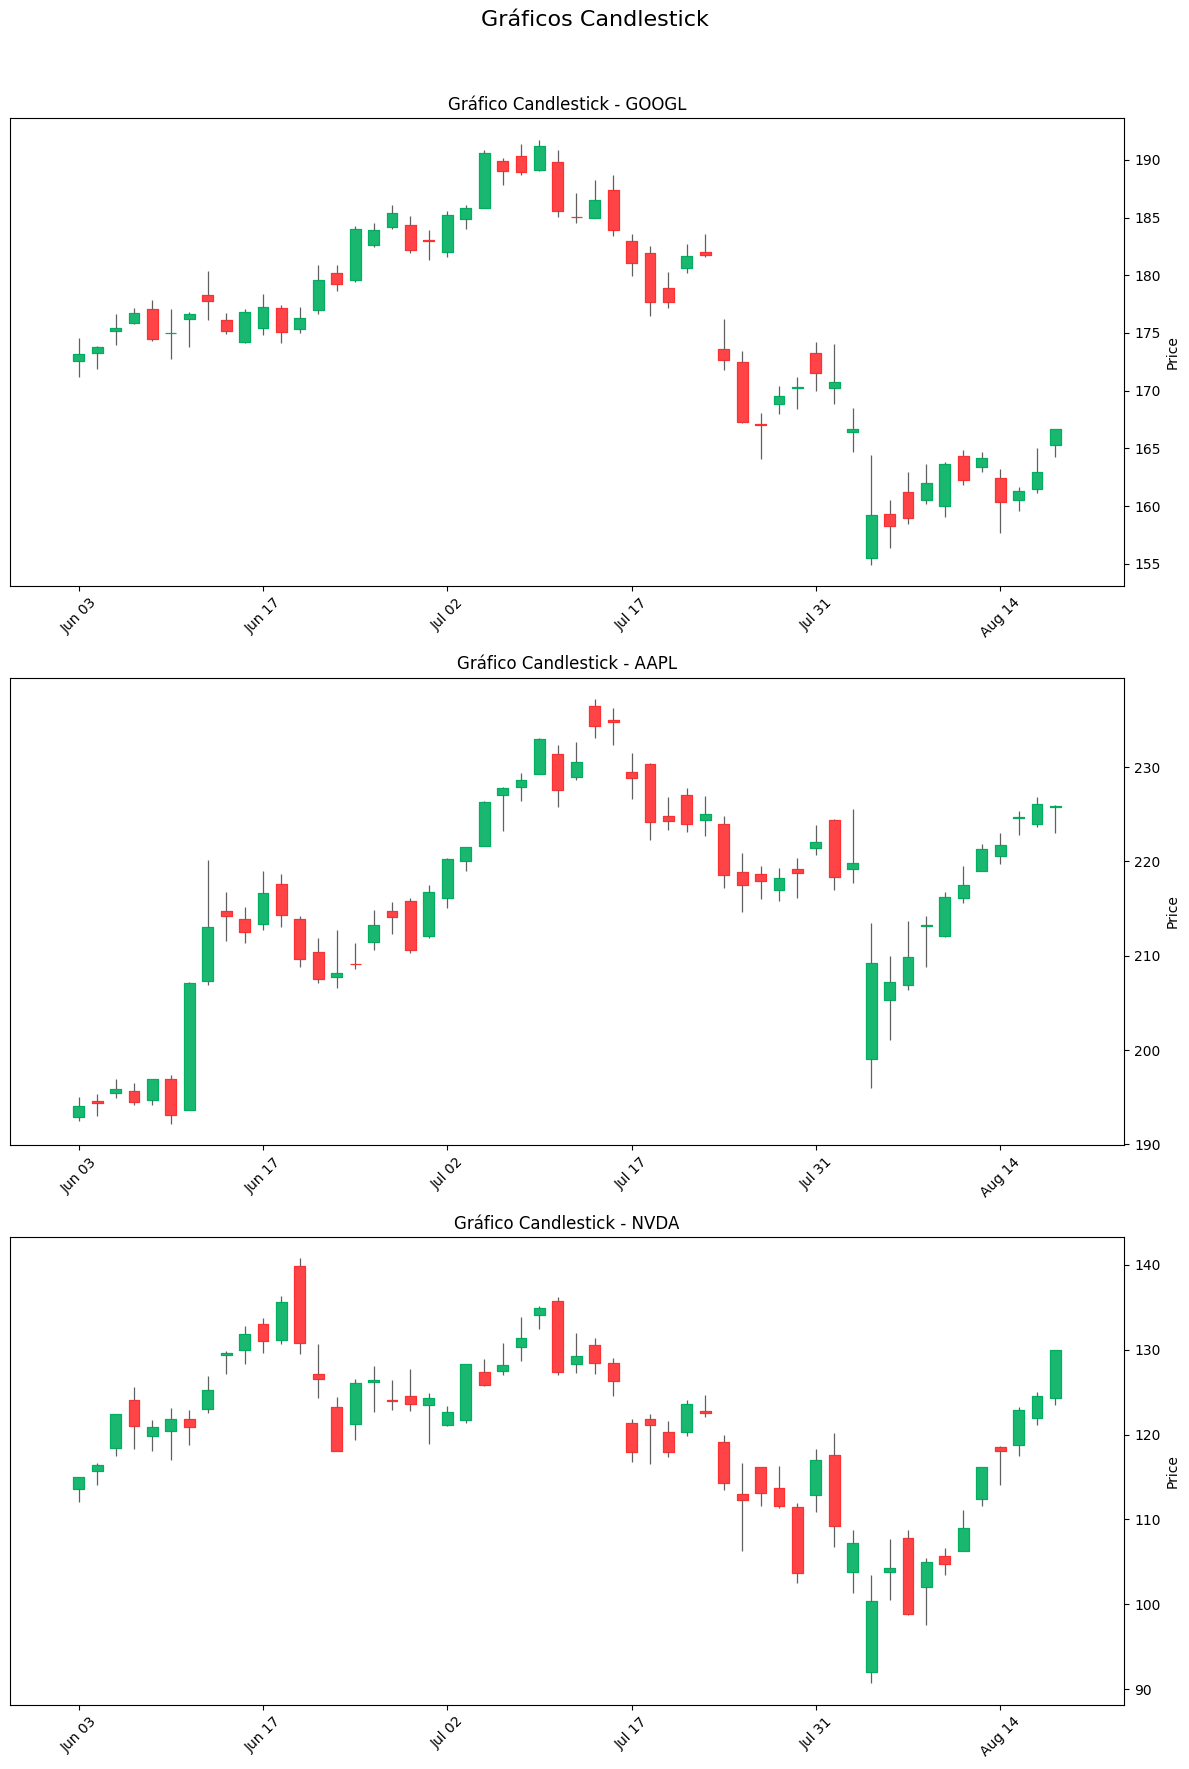

In [180]:

# Criar uma figura com múltiplos subplots
fig, axes = plt.subplots(nrows=len(symbols), ncols=1, figsize=(12, 6 * len(symbols)))

# Ajusta o layout para evitar sobreposição
fig.tight_layout(pad=4.0)

# Se houver apenas um gráfico, axes será um único eixo, então transforme em uma lista
if len(symbols) == 1:
    axes = [axes]

# Configura os gráficos de candlestick para cada símbolo
for i, symbol in enumerate(symbols):
    # Verificar se o símbolo existe no DataFrame
    if symbol in data['symbol'].values:
        group = data[data['symbol'] == symbol]
        ax = axes[i]

        # Plota o gráfico de candlestick
        mpf.plot(group[['Open', 'High', 'Low', 'Close']], type='candle', style='yahoo', ax=ax)

        # Define o título do gráfico
        ax.set_title(f'Gráfico Candlestick - {symbol}', fontsize=12)
    else:
        print(f"O símbolo '{symbol}' não foi encontrado no DataFrame.")

# Adiciona um título geral para a figura
fig.suptitle('Gráficos Candlestick', fontsize=16)

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Exibir os gráficos
plt.show()

### Indicadores Técnicos

#### Calcular Médias Moveis Simples - MMS

In [181]:
def calculate_sma(data, column, window_size):
  """
  Calculates the Simple Moving Average (SMA) for a given column and window size.

  Args:
    data: Pandas DataFrame containing the data.
    column: The name of the column to calculate the SMA for.
    window_size: The number of periods for the SMA calculation.

  Returns:
    A Pandas Series containing the SMA values.
  """

  sma = data[column].rolling(window=window_size).mean()
  return sma

# Exemplo de uso:
data['MMS_15'] = calculate_sma(data, 'Close', 15)

#Preencher DataFrame com próximo valor válido
data['MMS_15'] = calculate_sma(data, 'Close', 15).bfill()

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162 entries, 2024-06-03 to 2024-08-19
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       162 non-null    float64
 1   High       162 non-null    float64
 2   Low        162 non-null    float64
 3   Close      162 non-null    float64
 4   Adj Close  162 non-null    float64
 5   Volume     162 non-null    int64  
 6   symbol     162 non-null    object 
 7   MMS_15     162 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 11.4+ KB


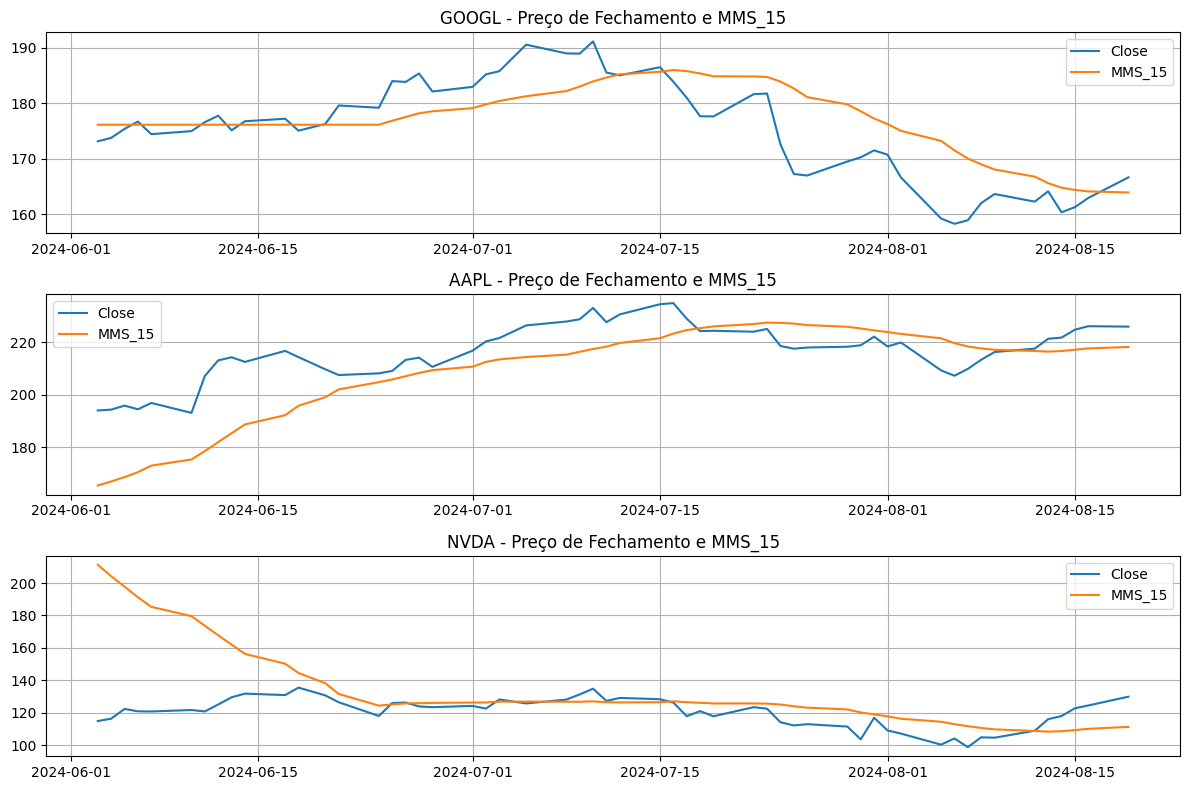

In [183]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Filtrando o DataFrame para as ações desejadas
filtered_data = data[data['symbol'].isin(symbols)]

# Criando subplots para visualizar múltiplos gráficos em uma mesma figura
fig, axes = plt.subplots(nrows=len(symbols), figsize=(12, 8))

# Iterando sobre as ações e criando gráficos
for i, symbol in enumerate(symbols):
    symbol_data = filtered_data[filtered_data['symbol'] == symbol]
    axes[i].plot(symbol_data.index, symbol_data['Close'], label='Close')
    axes[i].plot(symbol_data.index, symbol_data['MMS_15'], label='MMS_15')
    axes[i].set_title(f"{symbol} - Preço de Fechamento e MMS_15")
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

#### MACD para gerar sinais de compra e venda

In [184]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculando o MACD
def calculate_macd(data, short_period=12, long_period=26, signal_period=9):
    """
    Calcula o MACD, a linha de sinal e o histograma.

    Args:
        data: DataFrame com os dados.
        short_period: Período da média móvel curta (default: 12).
        long_period: Período da média móvel longa (default: 26).
        signal_period: Período da média móvel do sinal (default: 9).

    Returns:
        Um DataFrame com as colunas MACD, signal e hist.
    """

    short_ema = data['Close'].ewm(span=short_period, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_period, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_period, adjust=False).mean()
    hist = macd - signal
    return pd.DataFrame({'macd': macd, 'signal': signal, 'hist': hist})

# Adicionando o MACD ao DataFrame
macd_data = calculate_macd(data)
data = pd.concat([data, macd_data], axis=1)

In [185]:
import numpy as np

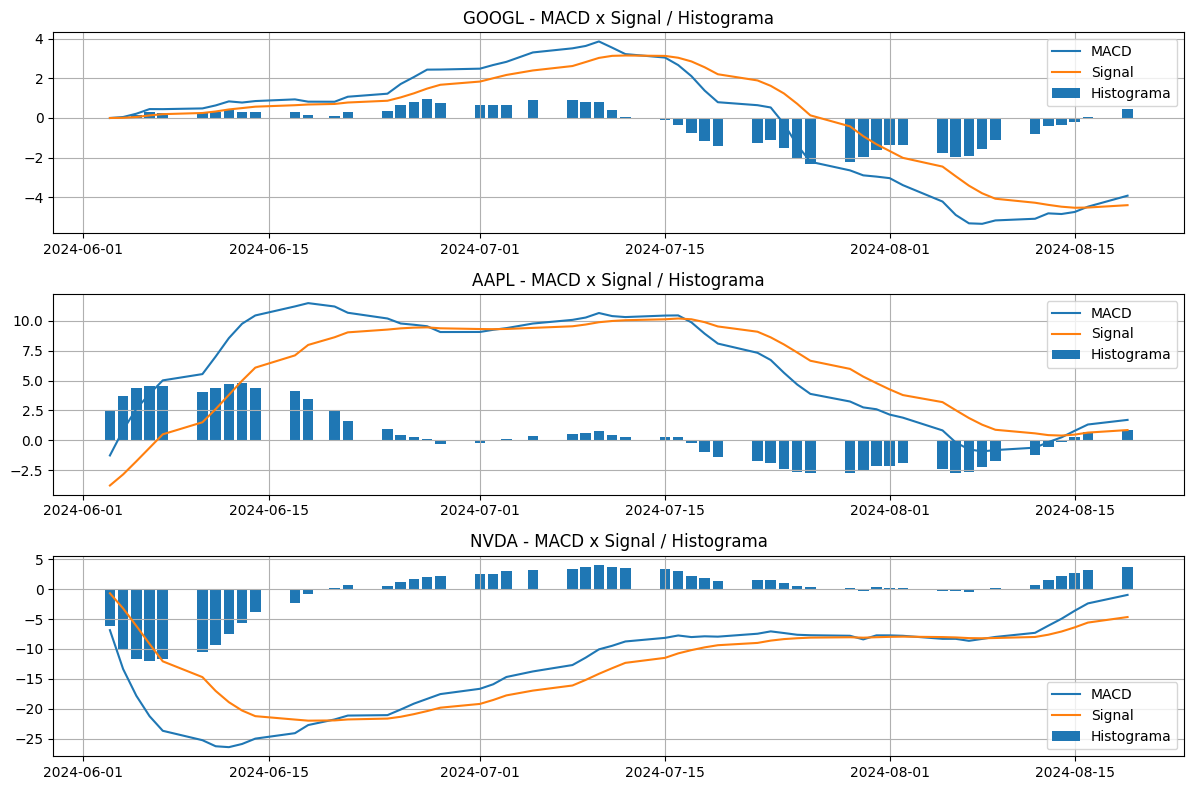

In [186]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Verificando e preenchendo valores NaN (se necessário)
data = data.ffill()  # Preenche com o valor anterior

# Criando subplots
fig, axes = plt.subplots(nrows=len(symbols), figsize=(12, 8))

for i, symbol in enumerate(symbols):
    symbol_data = data[data['symbol'] == symbol]

    # Plotando o preço de fechamento, MMS_15 e MACD
    #axes[i].plot(symbol_data.index, symbol_data['Close'], label='Close')
    #axes[i].plot(symbol_data.index, symbol_data['MMS_15'], label='MMS_15')
    axes[i].plot(symbol_data.index, symbol_data['macd'], label='MACD')
    axes[i].plot(symbol_data.index, symbol_data['signal'], label='Signal')
    axes[i].bar(symbol_data.index, symbol_data['hist'], label='Histograma')

    # Adicionando título, legenda e grid
    axes[i].set_title(f"{symbol} - MACD x Signal / Histograma")
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

#### RSI (Relative Strength Index)

In [187]:
#import pandas as pd
#import numpy as np

def calculate_rsi(data, period=14):
    """
    Calcula o RSI para um DataFrame de dados.

    Args:
        data: DataFrame com a coluna 'Close'.
        period: Período para o cálculo do RSI (default: 14).

    Returns:
        Um DataFrame com a coluna 'RSI'.
    """

    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Aplicando a função ao DataFrame
data['RSI'] = calculate_rsi(data)

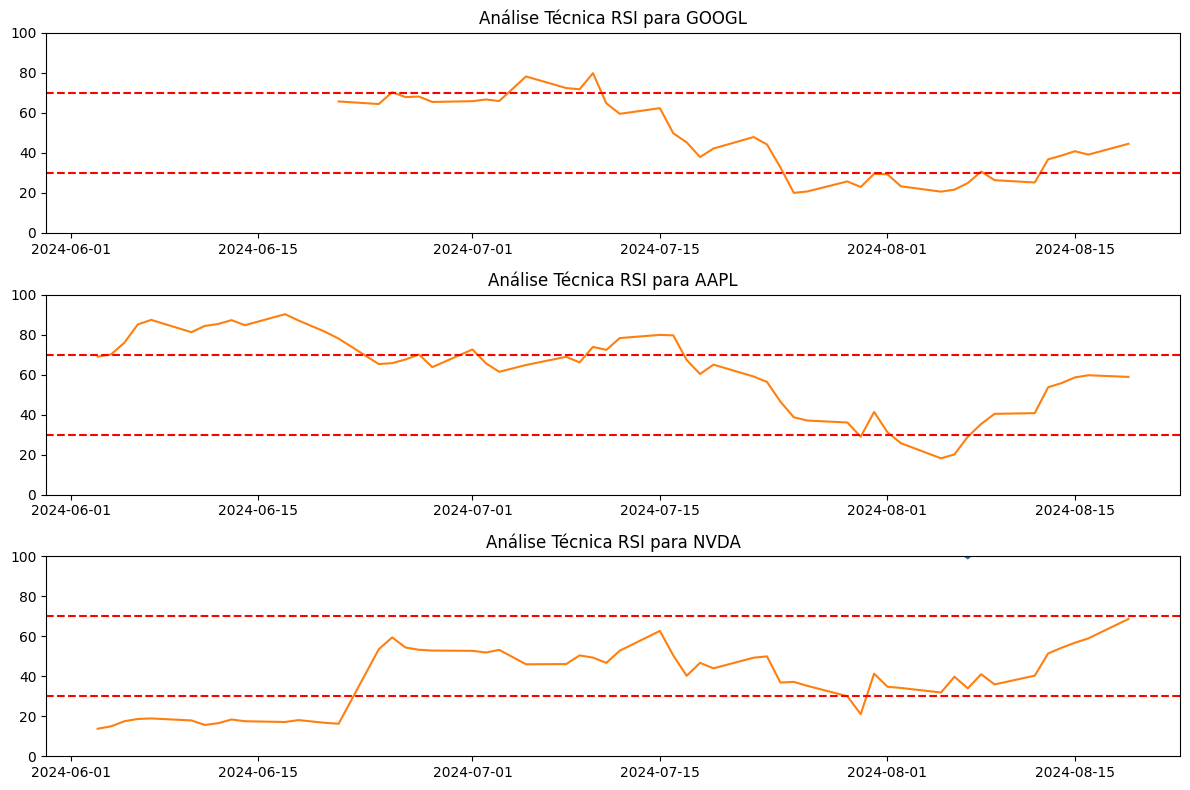

In [188]:
# Verificando e preenchendo valores NaN (se necessário)
data['RSI'] = data['RSI'].ffill()  # Preenche com o valor anterior

# Criando subplots
fig, axes = plt.subplots(nrows=len(symbols), figsize=(12, 8))

for i, symbol in enumerate(symbols):
    symbol_data = data[data['symbol'] == symbol]

    # Plotando o preço de fechamento, MMS_15, MACD e RSI
    axes[i].plot(symbol_data.index, symbol_data['Close'], label='Close')
    # ... (outros plots)
    axes[i].plot(symbol_data.index, symbol_data['RSI'], label='RSI')

    # Adicionando níveis de sobrecompra e sobrevenda
    axes[i].axhline(70, color='r', linestyle='--')
    axes[i].axhline(30, color='r', linestyle='--')

    # Adicionando título ao gráfico
    axes[i].set_title(f"Análise Técnica RSI para {symbol}")

    # Ajustando os limites do eixo y (opcional)
    axes[i].set_ylim(0, 100)

    
    # ... (resto do código para personalização)

plt.tight_layout()
plt.show()

#### Criando Estratégias de Negociação Baseadas em RSI e MACD

In [189]:
def generate_signals(data, rsi_overbought=70, rsi_oversold=30):
    """
    Gera sinais de compra e venda com base no cruzamento do MACD e nos níveis do RSI.

    Args:
        data: DataFrame com os dados históricos.
        rsi_overbought: Nível de sobrecompra para o RSI.
        rsi_oversold: Nível de sobrevenda para o RSI.

    Returns:
        DataFrame com os sinais de compra e venda.
    """

    # Criar uma nova coluna para os sinais
    data['signal_cv'] = 0

    # Condição de compra: MACD cruza para cima da linha de sinal e RSI abaixo do nível de sobrevenda
    data.loc[(data['macd'] > data['signal']) & (data['RSI'] < rsi_oversold), 'signal_cv'] = 1

    # Condição de venda: MACD cruza para baixo da linha de sinal e RSI acima do nível de sobrecompra
    data.loc[(data['macd'] < data['signal']) & (data['RSI'] > rsi_overbought), 'signal_cv'] = -1

    return data

In [190]:
data = generate_signals(data)

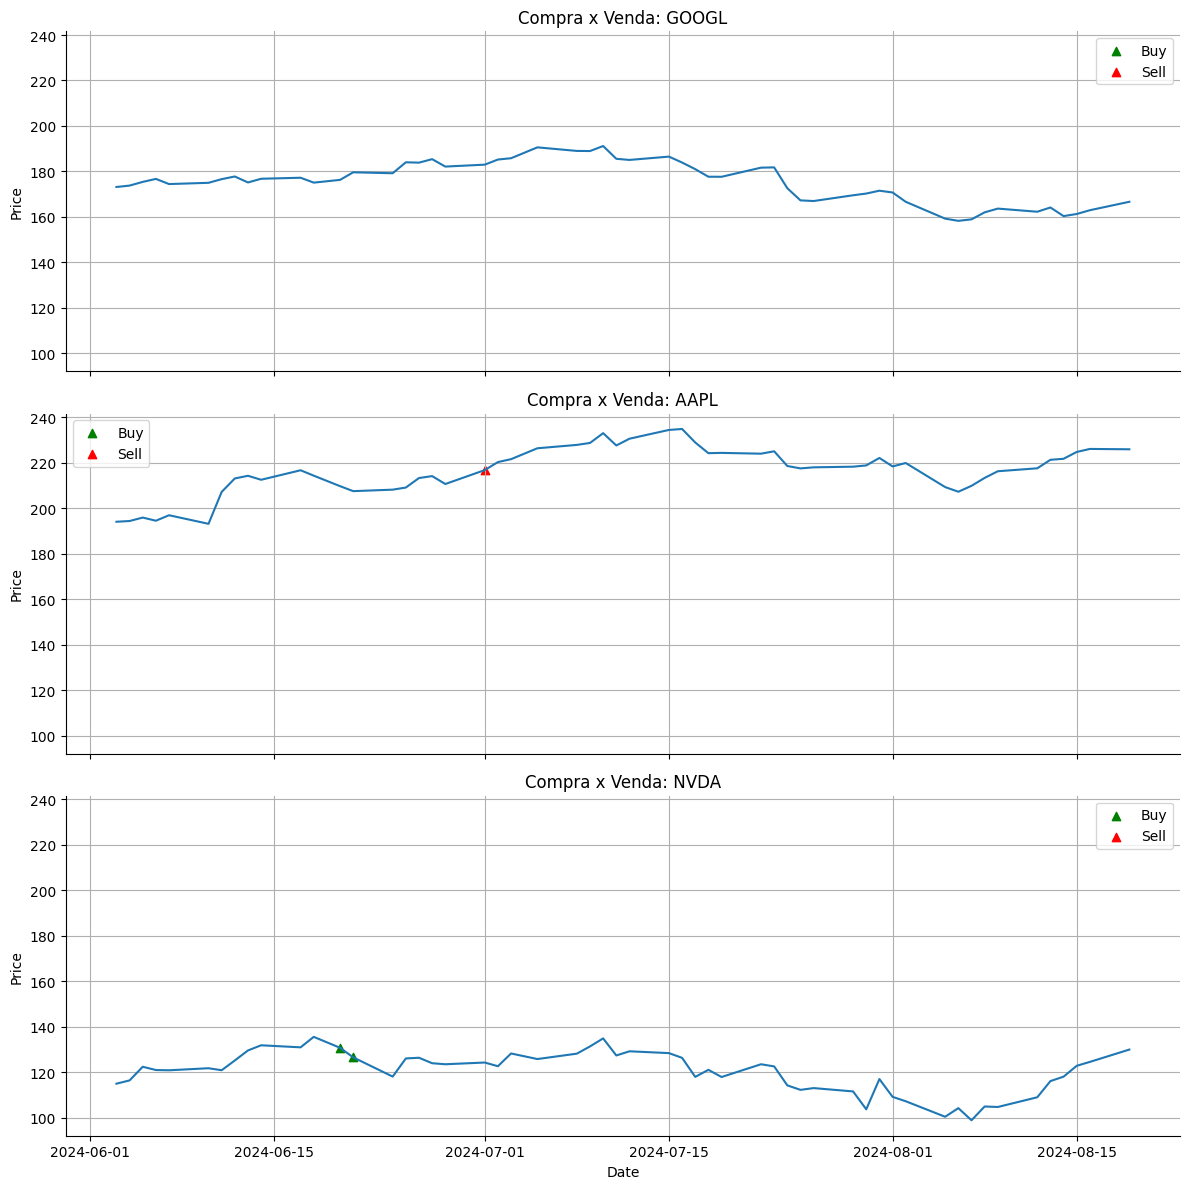

In [191]:
# Resetar o índice do DataFrame para tornar 'index' uma coluna
data_reset = data.reset_index()
data_reset.rename(columns={'index': 'Date'}, inplace=True)

# Criar os subplots em uma única coluna
g = sns.FacetGrid(data_reset, col="symbol", col_wrap=1, height=4, aspect=3)

# Plotar o preço de fechamento
g.map(plt.plot, 'Date', 'Close')

# Plotar sinais de compra e venda
for ax in g.axes.flat:
    symbol = ax.get_title().split('=')[-1].strip()
    df_symbol = data_reset[data_reset['symbol'] == symbol]
    
    # Plotar sinais de compra
    buy_signals = df_symbol[df_symbol['signal_cv'] == 1]
    ax.scatter(buy_signals['Date'], buy_signals['Close'], color='green', marker='^', label='Buy')

    # Plotar sinais de venda
    sell_signals = df_symbol[df_symbol['signal_cv'] == -1]
    ax.scatter(sell_signals['Date'], sell_signals['Close'], color='red', marker='^', label='Sell')

    # Adicionar rótulos, título e grid
    ax.set_title(f"Compra x Venda: {symbol}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()
